<a href="https://colab.research.google.com/github/italo2403/Big/blob/main/%C3%8Dndice_de_Criminalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

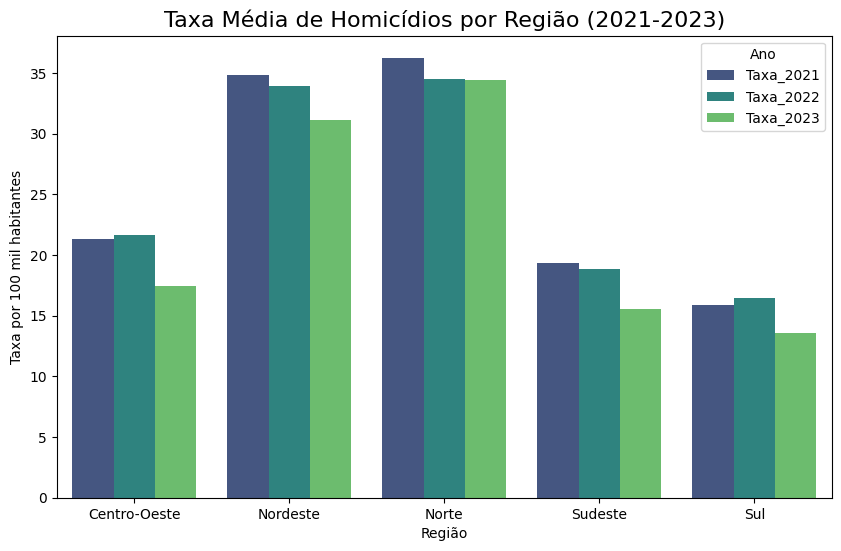

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/Homicidios_Brasil_2021_2023.xlsx'
df = pd.read_excel(file_path, sheet_name='Homicídios')

populacao_idh_data = {
    'Estado': [
        'Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
        'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
        'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
        'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
        'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
        'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'
    ],
    'População': [
        894470, 3351543, 861773, 4269995, 14812617, 9240580,
        3224686, 4108508, 7358081, 7075181, 3567234, 2839188,
        21411923, 9235293, 4059905, 11653407, 9674793, 3289290,
        17462482, 3560903, 11466630, 1815278, 652713, 7727932,
        46649132, 2347816, 1607363
    ],
    'IDH': [
        0.710, 0.684, 0.688, 0.700, 0.691, 0.734,
        0.814, 0.771, 0.737, 0.676, 0.736, 0.742,
        0.774, 0.690, 0.698, 0.769, 0.719, 0.690,
        0.762, 0.728, 0.771, 0.700, 0.699, 0.792,
        0.806, 0.702, 0.731
    ],
    'Região': [
        'Norte', 'Nordeste', 'Norte', 'Norte', 'Nordeste', 'Nordeste',
        'Centro-Oeste', 'Sudeste', 'Centro-Oeste', 'Nordeste',
        'Centro-Oeste', 'Centro-Oeste', 'Sudeste', 'Norte',
        'Nordeste', 'Sul', 'Nordeste', 'Nordeste', 'Sudeste',
        'Nordeste', 'Sul', 'Norte', 'Norte', 'Sul',
        'Sudeste', 'Nordeste', 'Norte'
    ]
}

populacao_idh_df = pd.DataFrame(populacao_idh_data)

df = df.merge(populacao_idh_df, on='Estado')

for year in ['2021', '2022', '2023']:
    df[f'Taxa_{year}'] = (df[year] / df['População']) * 100000

regiao_taxa = df.groupby('Região')[[f'Taxa_{year}' for year in ['2021', '2022', '2023']]].mean().reset_index()
regiao_taxa_melted = regiao_taxa.melt(id_vars='Região', var_name='Ano', value_name='Taxa de Homicídios')

plt.figure(figsize=(10, 6))
sns.barplot(data=regiao_taxa_melted, x='Região', y='Taxa de Homicídios', hue='Ano', palette='viridis')
plt.title('Taxa Média de Homicídios por Região (2021-2023)', fontsize=16)
plt.ylabel('Taxa por 100 mil habitantes')
plt.xlabel('Região')
plt.legend(title='Ano')
plt.show()

<ipython-input-21-b6066aa88456>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_estados, x='Taxa_2023', y='Estado', palette='Reds_r')


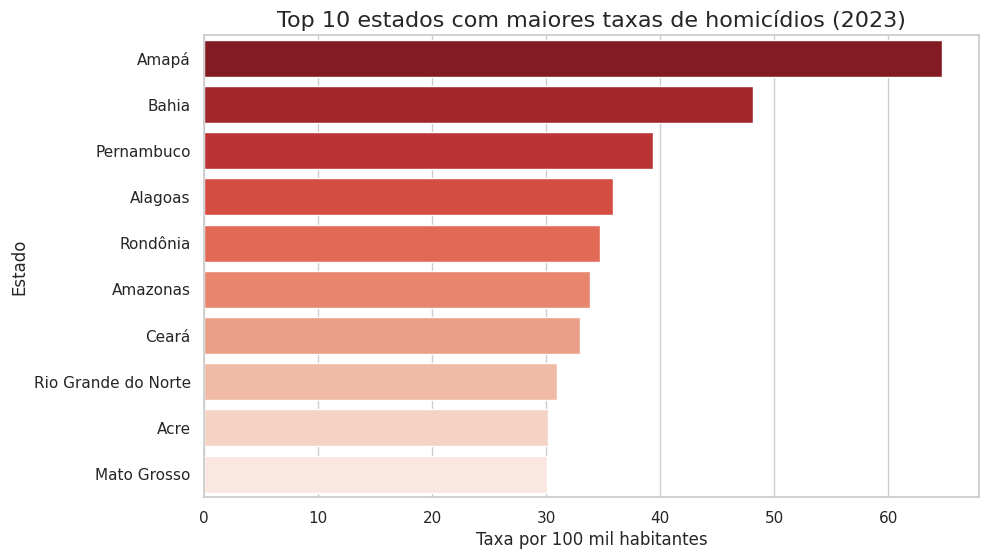

In [ ]:
top_estados = df.sort_values('Taxa_2023', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_estados, x='Taxa_2023', y='Estado', palette='Reds_r')
plt.title('Top 10 estados com maiores taxas de homicídios (2023)', fontsize=16)
plt.xlabel('Taxa por 100 mil habitantes')
plt.ylabel('Estado')
plt.show()

<ipython-input-22-d30df932d69a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_estados, x='Taxa_2022', y='Estado', palette='Reds_r')


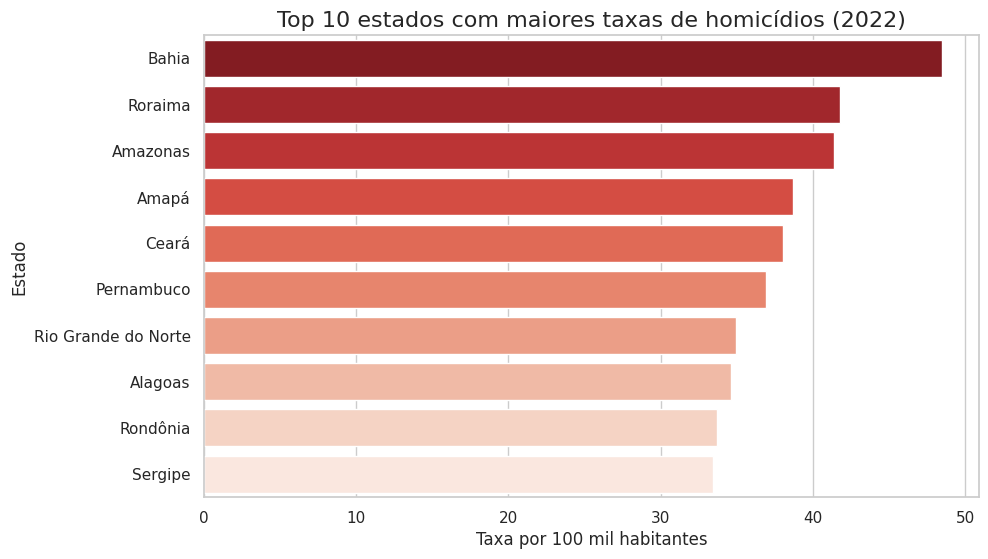

In [ ]:
top_estados = df.sort_values('Taxa_2022', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_estados, x='Taxa_2022', y='Estado', palette='Reds_r')
plt.title('Top 10 estados com maiores taxas de homicídios (2022)', fontsize=16)
plt.xlabel('Taxa por 100 mil habitantes')
plt.ylabel('Estado')
plt.show()

<ipython-input-23-55c55e1e5e17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_estados, x='Taxa_2021', y='Estado', palette='Reds_r')


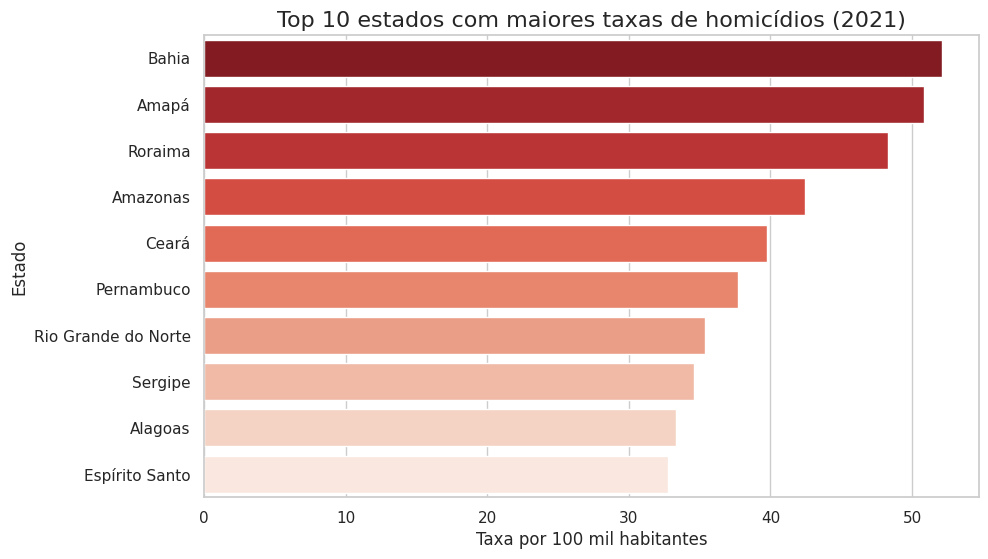

In [ ]:
top_estados = df.sort_values('Taxa_2021', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_estados, x='Taxa_2021', y='Estado', palette='Reds_r')
plt.title('Top 10 estados com maiores taxas de homicídios (2021)', fontsize=16)
plt.xlabel('Taxa por 100 mil habitantes')
plt.ylabel('Estado')
plt.show()

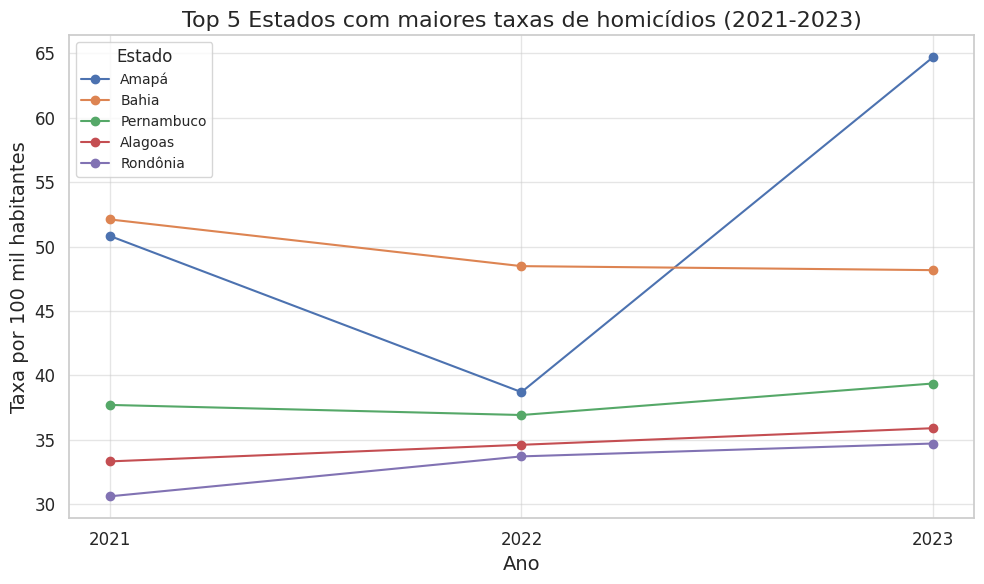

In [ ]:
top_5_estados = df.nlargest(5, 'Taxa_2023')

df_melted = top_5_estados.melt(id_vars=['Estado'], value_vars=['Taxa_2021', 'Taxa_2022', 'Taxa_2023'],
                               var_name='Ano', value_name='Taxa')
df_melted['Ano'] = df_melted['Ano'].str.extract('(\d{4})')

plt.figure(figsize=(10, 6))
for estado in top_5_estados['Estado']:
    estado_data = df_melted[df_melted['Estado'] == estado]
    plt.plot(estado_data['Ano'], estado_data['Taxa'], marker='o', label=estado)

plt.title('Top 5 Estados com maiores taxas de homicídios (2021-2023)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Taxa por 100 mil habitantes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Estado', fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

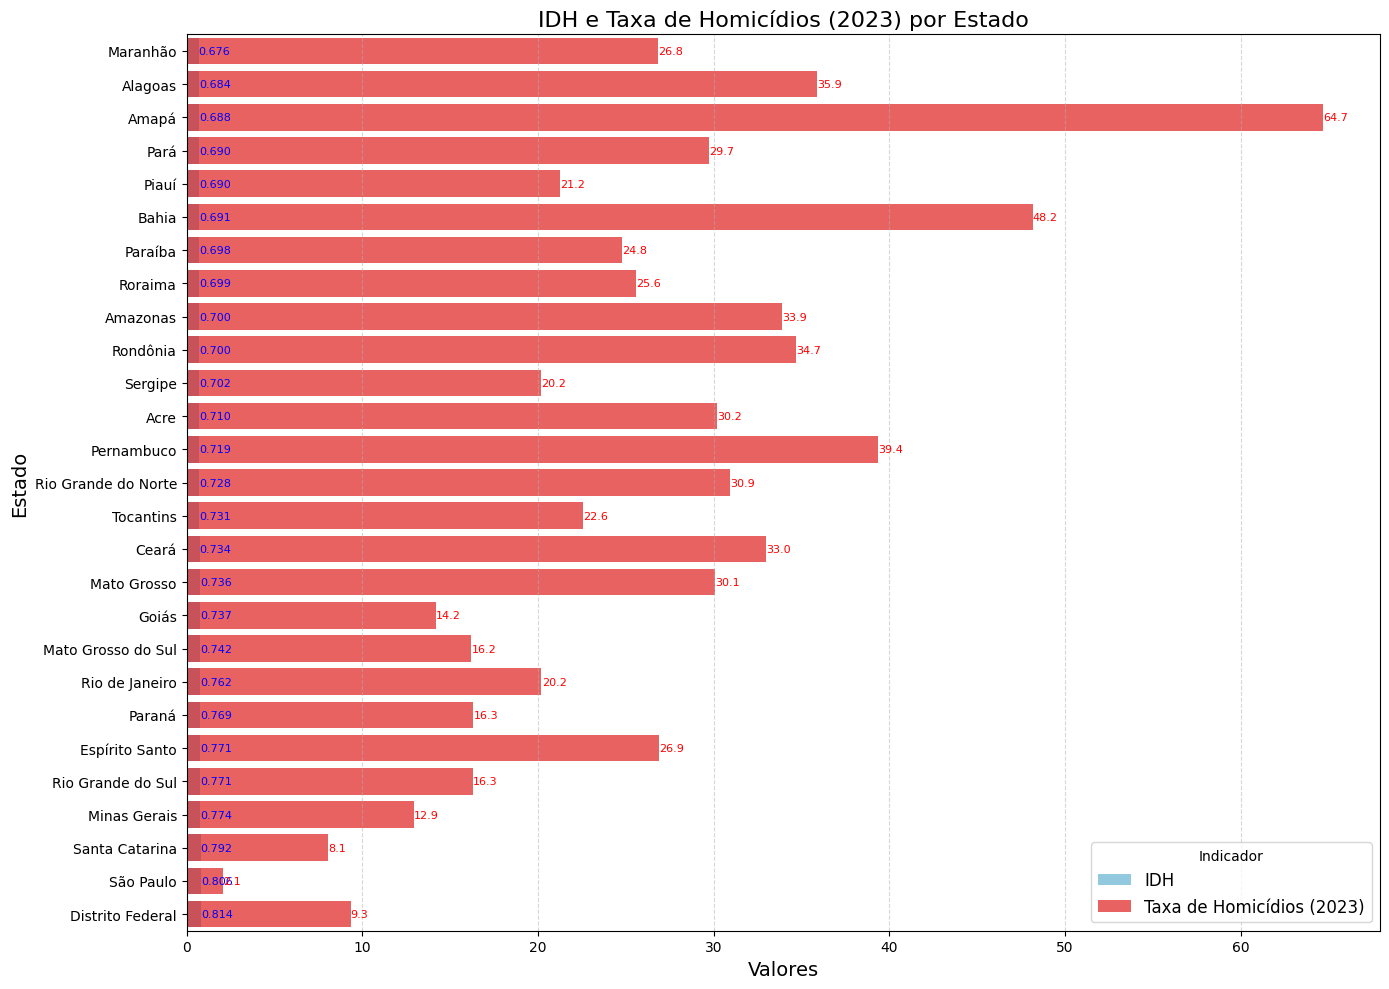

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values(by='IDH', ascending=True)

plt.figure(figsize=(14, 10))

sns.barplot(
    data=df_sorted,
    x='IDH',
    y='Estado',
    color='skyblue',
    label='IDH'
)

sns.barplot(
    data=df_sorted,
    x='Taxa_2023',
    y='Estado',
    color='red',
    alpha=0.7,
    label='Taxa de Homicídios (2023)'
)

for i in range(len(df_sorted)):
    plt.text(df_sorted['IDH'].iloc[i] + 0.01, i, f"{df_sorted['IDH'].iloc[i]:.3f}", va='center', color='blue', fontsize=8)
    plt.text(df_sorted['Taxa_2023'].iloc[i] + 0.01, i, f"{df_sorted['Taxa_2023'].iloc[i]:.1f}", va='center', color='red', fontsize=8)

plt.title('IDH e Taxa de Homicídios (2023) por Estado', fontsize=16)
plt.xlabel('Valores', fontsize=14)
plt.ylabel('Estado', fontsize=14)
plt.legend(title='Indicador', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
for year in ['2021', '2022', '2023']:
    df[f'Taxa_{year}'] = (df[year] / df['População']) * 100000

df['Taxa_Media'] = df[[f'Taxa_{year}' for year in ['2021', '2022', '2023']]].mean(axis=1)

tabela = df[['Estado', 'Taxa_2021', 'Taxa_2022', 'Taxa_2023', 'Taxa_Media']]

print(tabela)

                 Estado  Taxa_2021  Taxa_2022  Taxa_2023  Taxa_Media
0                  Acre  22.677681  26.325829  30.171175   26.391562
1               Alagoas  33.312045  34.600904  35.889763   34.600904
2                 Amapá  50.819575  38.693228  64.704705   51.405836
3              Amazonas  42.444355  41.397521  33.879351   39.240409
4                 Bahia  52.105964  48.480300  48.169529   49.585264
5                 Ceará  39.730485  38.070980  32.994850   36.932105
6      Distrito Federal  12.913004  11.027894   9.331295   11.090731
7        Espírito Santo  32.800000  32.600000  26.900000   30.766667
8                 Goiás  24.229375  22.478964  14.187543   20.298627
9              Maranhão  28.198081  27.307615  26.812912   27.439536
10          Mato Grosso  25.501999  30.096109  30.096109   28.564739
11   Mato Grosso do Sul  22.700000  22.900000  16.200000   20.600000
12         Minas Gerais  14.203363  14.400632  12.921115   13.841703
13                 Pará  30.439608